In [1]:
import seaborn as sns
import json
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np
import plotly.express as px 
sns.set_style("darkgrid")

# Sleep Data

In [2]:
# Load the JSON data from file
with open('data/sleep.json', 'r') as f:
    data = json.load(f)

# Create an empty DataFrame to store the extracted data
sleep_df = pd.DataFrame()

# Loop over each dictionary in the list
for sleep_dict in data:
    # Create a pandas Series from the dictionary and add it to the DataFrame
    sleep_series = pd.Series(sleep_dict)
    sleep_df = sleep_df.append(sleep_series, ignore_index=True)

# Print the resulting DataFrame
sleep_df=sleep_df.fillna(0)
sleep_df['calendarDate'] = pd.to_datetime(sleep_df['calendarDate'])
sleep_df['weekday'] = sleep_df['calendarDate'].dt.day_name()
def is_weekend(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Regular day'

# Apply the function to the day column and create a new column called 'day_type'
sleep_df['day_type'] = sleep_df['weekday'].apply(is_weekend)
sleep_df

,averageRespiration,avgSleepStress,awakeCount,awakeSleepSeconds,calendarDate,deepSleepSeconds,highestRespiration,lightSleepSeconds,lowestRespiration,remSleepSeconds,restlessMomentCount,retro,sleepEndTimestampGMT,sleepScores,sleepStartTimestampGMT,sleepWindowConfirmationType,unmeasurableSeconds,spo2SleepSummary,weekday,day_type
0,13.0,3.945455,1.0,1740.0,2022-11-01,6300.0,16.0,18360.0,10.0,4560.0,43.0,0.0,2022-11-01T07:15:00.0,"{'overallScore': 89, 'qualityScore': 88, 'dura...",2022-10-31T22:39:00.0,ENHANCED_CONFIRMED_FINAL,0.0,0,Tuesday,Regular day
1,13.0,9.361884,1.0,1140.0,2022-11-02,3420.0,17.0,23340.0,9.0,2640.0,48.0,0.0,2022-11-02T07:21:00.0,"{'overallScore': 79, 'qualityScore': 80, 'dura...",2022-11-01T22:52:00.0,ENHANCED_CONFIRMED_FINAL,0.0,0,Wednesday,Regular day
2,13.0,12.441441,2.0,2520.0,2022-11-03,4200.0,19.0,18540.0,11.0,2340.0,42.0,0.0,2022-11-03T07:21:00.0,"{'overallScore': 73, 'qualityScore': 76, 'dura...",2022-11-02T23:41:00.0,ENHANCED_CONFIRMED_FINAL,0.0,"{'userProfilePk': 108563008, 'deviceId': 34117...",Thursday,Regular day
3,13.0,10.534274,2.0,2160.0,2022-11-04,7020.0,18.0,17340.0,11.0,3240.0,47.0,0.0,2022-11-04T07:26:00.0,"{'overallScore': 79, 'qualityScore': 75, 'dura...",2022-11-03T23:10:00.0,ENHANCED_CONFIRMED_FINAL,0.0,"{'userProfilePk': 108563008, 'deviceId': 34117...",Friday,Regular day
4,14.0,10.575949,0.0,240.0,2022-11-05,5700.0,28.0,8220.0,9.0,1800.0,22.0,0.0,2022-11-05T02:56:00.0,"{'overallScore': 57, 'qualityScore': 92, 'dura...",2022-11-04T22:30:00.0,ENHANCED_CONFIRMED_FINAL,0.0,"{'userProfilePk': 108563008, 'deviceId': 34117...",Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,13.0,5.850000,1.0,540.0,2023-04-08,12000.0,25.0,28980.0,9.0,11520.0,105.0,0.0,2023-04-08T11:23:00.0,"{'overallScore': 93, 'qualityScore': 91, 'dura...",2023-04-07T20:39:00.0,ENHANCED_CONFIRMED_FINAL,0.0,"{'userProfilePk': 108563008, 'deviceId': 34117...",Saturday,Weekend
147,14.0,12.400000,2.0,3180.0,2023-04-09,8040.0,23.0,16800.0,10.0,9240.0,60.0,0.0,2023-04-09T08:13:00.0,"{'overallScore': 83, 'qualityScore': 84, 'dura...",2023-04-08T21:52:00.0,ENHANCED_CONFIRMED_FINAL,0.0,"{'userProfilePk': 108563008, 'deviceId': 34117...",Sunday,Weekend
148,14.0,13.510000,1.0,2220.0,2023-04-10,6960.0,24.0,10800.0,9.0,6000.0,47.0,0.0,2023-04-10T07:01:00.0,"{'overallScore': 78, 'qualityScore': 86, 'dura...",2023-04-09T23:48:00.0,ENHANCED_CONFIRMED_FINAL,0.0,"{'userProfilePk': 108563008, 'deviceId': 34117...",Monday,Regular day
149,14.0,23.379999,0.0,120.0,2023-04-11,2820.0,19.0,14280.0,12.0,1740.0,42.0,0.0,2023-04-11T05:58:00.0,"{'overallScore': 61, 'qualityScore': 71, 'dura...",2023-04-11T00:42:00.0,ENHANCED_CONFIRMED_FINAL,0.0,"{'userProfilePk': 108563008, 'deviceId': 34117...",Tuesday,Regular day


In [3]:
sleep_df["start_date"] = pd.to_datetime(sleep_df["sleepStartTimestampGMT"])
sleep_df["end_date"] = pd.to_datetime(sleep_df["sleepEndTimestampGMT"])
sleep_df["start_time"] = sleep_df["start_date"].dt.time
sleep_df["end_time"] = sleep_df["end_date"].dt.time
sleep_df['duration'] = (sleep_df['end_date'] - sleep_df['start_date']).dt.total_seconds() / 3600

df =sleep_df[["start_time","end_time","duration","day_type"]]
df["Day"]= df.index
today = datetime.now().date()

for index, row in df.iterrows():
    start_time = row['start_time']
    end_time = row['end_time']
    if start_time < datetime.strptime('14:00:00', '%H:%M:%S').time():
        start_date = today + timedelta(days=1)
    else:
        start_date = today

    if end_time < start_time:
        end_date = start_date + timedelta(days=1)
    else:
        end_date = start_date

    start_datetime = datetime.combine(start_date, start_time)
    end_datetime = datetime.combine(end_date, end_time)


    df.at[index, 'start_time'] = start_datetime
    df.at[index, 'end_time'] = end_datetime

fig = px.timeline(df, x_start="start_time", x_end="end_time", y="Day", color="day_type", width=800, height=1000)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()
df_sleep_dur=df.copy()


/tmp/ipykernel_233858/440936121.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day"]= df.index


In [4]:
df_sleep_dur['timestamp_start'] = pd.to_datetime(df_sleep_dur['start_time'], infer_datetime_format=True)
df_sleep_dur['timestamp_end'] = pd.to_datetime(df_sleep_dur['end_time'], infer_datetime_format=True)

print(f"Average start sleeping time: {df_sleep_dur['timestamp_start'].mean().time()}")
print(f"Average wake up time: {df_sleep_dur['timestamp_end'].mean().time()}")

Average start sleeping time: 23:44:38.145695
Average wake up time: 07:28:56.337748


/tmp/ipykernel_233858/1721377356.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



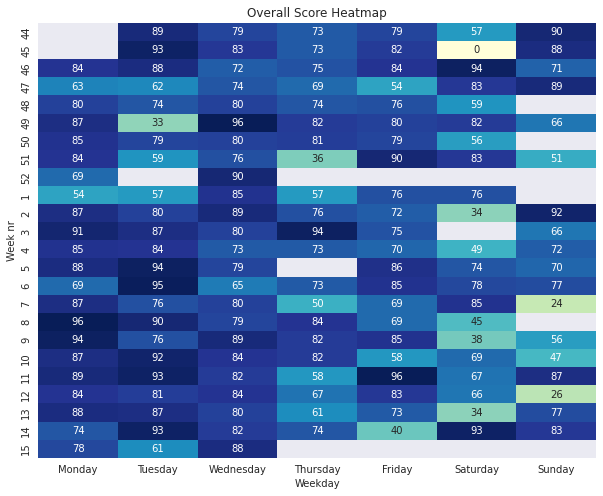

In [5]:
sleep_df['week_number'] = sleep_df['calendarDate'].dt.isocalendar().week
sleep_df['overallScore'] = sleep_df['sleepScores'].apply(lambda x: x['overallScore'])

heat_df = sleep_df[["week_number","overallScore","weekday"]]
# Convert the weekday column to a categorical variable with a specific order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heat_df["weekday"] = pd.Categorical(heat_df["weekday"], categories=weekday_order)

# Pivot the data to create a 2D matrix with weekday as rows and calendarDate as columns
heat_data = heat_df.pivot("week_number", "weekday",  "overallScore")
df_44_to_52 = heat_data.iloc[15:]
pivoted_data = pd.concat([df_44_to_52, heat_data.iloc[:15]])
# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pivoted_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=ax)

# Set the axis labels and title
ax.set_ylabel("Week nr")
ax.set_xlabel("Weekday")
ax.set_title("Overall Score Heatmap")

plt.show()

/tmp/ipykernel_233858/2710141545.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



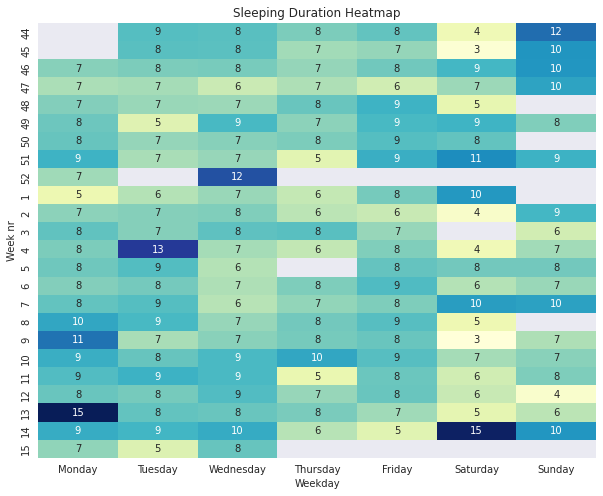

In [6]:
heat_df = sleep_df[["week_number","duration","weekday"]]
# Convert the weekday column to a categorical variable with a specific order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heat_df["weekday"] = pd.Categorical(heat_df["weekday"], categories=weekday_order)

# Pivot the data to create a 2D matrix with weekday as rows and calendarDate as columns
heat_data = heat_df.pivot("week_number", "weekday",  "duration")
df_44_to_52 = heat_data.iloc[15:]
pivoted_data = pd.concat([df_44_to_52, heat_data.iloc[:15]])
# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pivoted_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=ax)

# Set the axis labels and title
ax.set_ylabel("Week nr")
ax.set_xlabel("Weekday")
ax.set_title("Sleeping Duration Heatmap")

plt.show()

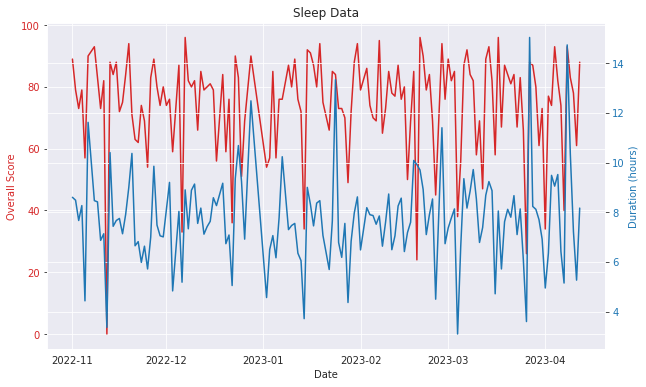

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the first y-axis for overall score
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Overall Score', color=color)
ax1.plot(sleep_df['calendarDate'], sleep_df['overallScore'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis for duration
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Duration (hours)', color=color)
ax2.plot(sleep_df['calendarDate'], sleep_df['duration'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set the plot title
plt.title('Sleep Data')

# Show the plot
plt.show()


In [8]:
sleep_df['deepSleepHours'] = sleep_df['deepSleepSeconds'] / 3600
sleep_df['lightSleepHours'] = sleep_df['lightSleepSeconds'] / 3600
sleep_df['remSleepHours'] = sleep_df['remSleepSeconds'] / 3600
sleep_df['awakeSleepHours'] = sleep_df['awakeSleepSeconds'] / 3600
sleep_df['totSleepHours'] = sleep_df['deepSleepHours'] + sleep_df['lightSleepHours'] + sleep_df['remSleepHours']
sleep_df[['deepSleepHours', 'lightSleepHours', 'remSleepHours', 'awakeSleepHours', "totSleepHours"]]

,deepSleepHours,lightSleepHours,remSleepHours,awakeSleepHours,totSleepHours
0,1.750000,5.100000,1.266667,0.483333,8.116667
1,0.950000,6.483333,0.733333,0.316667,8.166667
2,1.166667,5.150000,0.650000,0.700000,6.966667
3,1.950000,4.816667,0.900000,0.600000,7.666667
4,1.583333,2.283333,0.500000,0.066667,4.366667
...,...,...,...,...,...
146,3.333333,8.050000,3.200000,0.150000,14.583333
147,2.233333,4.666667,2.566667,0.883333,9.466667
148,1.933333,3.000000,1.666667,0.616667,6.600000
149,0.783333,3.966667,0.483333,0.033333,5.233333


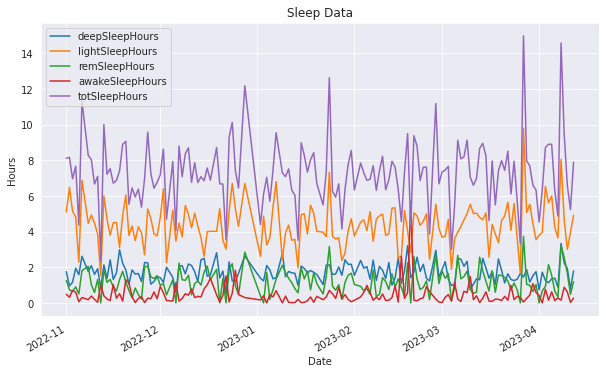

In [9]:
# Create a line plot of the sleep data
fig, ax = plt.subplots(figsize=(10, 6))

sleep_df.plot(x='calendarDate', y=['deepSleepHours', 'lightSleepHours', 'remSleepHours', 'awakeSleepHours', "totSleepHours"], ax=ax)
sns.set_theme()
# Set the plot title and axis labels
ax.set_title('Sleep Data')
ax.set_xlabel('Date')
ax.set_ylabel('Hours')

# Show the plot
plt.show()

In [10]:
print(f"Avg light sleep: {round(sleep_df['lightSleepHours'].mean(),2)} hours")
print(f"Avg deep sleep: {round(sleep_df['deepSleepHours'].mean(),2)} hours")
print(f"Avg rem sleep: {round(sleep_df['remSleepHours'].mean(),2)} hours")
print(f"Avg total sleep: {round(sleep_df['totSleepHours'].mean(),2)} hours")

print(f"Min total sleep: {round(sleep_df['totSleepHours'].min(),2)} hours")
print(f"Max total sleep: {round(sleep_df['totSleepHours'].max(),2)} hours")



Avg light sleep: 4.39 hours
Avg deep sleep: 1.72 hours
Avg rem sleep: 1.18 hours
Avg total sleep: 7.29 hours
Min total sleep: 2.37 hours
Max total sleep: 14.98 hours


In [11]:
# Group by weekday and calculate the mean sleep durations
sleep_weekday = sleep_df.groupby(sleep_df['weekday']).mean()
sleep_weekday

,averageRespiration,avgSleepStress,awakeCount,awakeSleepSeconds,deepSleepSeconds,highestRespiration,lightSleepSeconds,lowestRespiration,remSleepSeconds,restlessMomentCount,retro,unmeasurableSeconds,duration,week_number,overallScore,deepSleepHours,lightSleepHours,remSleepHours,awakeSleepHours,totSleepHours
weekday,,,,,,,,,,,,,,,,,,,,
Friday,13.500000,16.666191,1.545455,1688.181818,5956.363636,19.909091,16440.000000,10.681818,3968.181818,44.181818,0.0,0.000000,7.793813,22.045455,75.500000,1.654545,4.566667,1.102273,0.468939,7.323485
Monday,13.863636,13.634857,1.181818,1090.909091,6349.090909,20.409091,16903.636364,10.863636,5803.636364,49.590909,0.0,27.272727,8.381818,21.045455,81.954545,1.763636,4.695455,1.612121,0.303030,8.071212
Saturday,14.095238,21.310707,1.476190,1400.000000,5840.000000,21.190476,14008.571429,11.380952,3671.428571,38.428571,0.0,0.000000,6.922579,22.952381,62.952381,1.622222,3.891270,1.019841,0.388889,6.533333
Sunday,14.388889,21.088534,1.888889,3060.000000,6763.333333,21.000000,15686.666667,11.333333,3946.666667,44.722222,0.0,0.000000,8.183025,21.000000,68.444444,1.878704,4.357407,1.096296,0.850000,7.332407
Thursday,13.761905,15.178733,1.285714,2045.714286,6008.571429,20.190476,14488.571429,11.095238,3117.142857,40.857143,0.0,0.000000,7.127778,22.857143,71.142857,1.669048,4.024603,0.865873,0.568254,6.559524
Tuesday,13.652174,14.588153,0.782609,1160.869565,6026.086957,19.391304,16536.521739,10.782609,4575.652174,46.130435,0.0,0.000000,7.861594,21.739130,79.260870,1.673913,4.593478,1.271014,0.322464,7.538406
Wednesday,13.250000,13.598652,0.916667,1127.500000,6387.500000,19.541667,16377.500000,10.333333,4522.500000,47.291667,0.0,0.000000,7.894329,23.000000,81.208333,1.774306,4.549306,1.256250,0.313194,7.579861


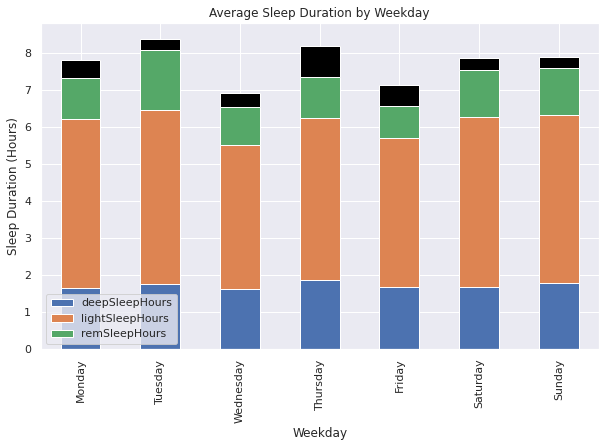

In [12]:
# Plot a stacked bar chart
sleep_weekday[['deepSleepHours', 'lightSleepHours', 'remSleepHours']].plot(kind='bar', stacked=True)
sleep_weekday['awakeSleepHours'].plot(kind='bar', color='black', bottom=sleep_weekday[['deepSleepHours', 'lightSleepHours', 'remSleepHours']].sum(axis=1), figsize=(10, 6))

# Set the labels and title
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Weekday')
plt.ylabel('Sleep Duration (Hours)')
plt.title('Average Sleep Duration by Weekday')

# Show the plot
plt.show()

# Activities Data

In [13]:
df_act = pd.read_csv('data/activities.csv')
df_act['Activity Type'] = df_act['Activity Type'].str.replace('Resort Skiing/Snowboarding','Resort Skiing')
df_act['Start Time'] = pd.to_datetime(df_act['Start Time'], utc=True)
df_act['End Time'] = pd.to_datetime(df_act['End Time'], utc=True)
df_act['weekday'] = df_act['Start Time'].dt.day_name()


In [14]:
df_act.columns

Index(['Start Time', 'End Time', 'Activity ID', 'Activity Name', 'Description',
       'Location Name', 'Time Zone', 'Offset', 'Duration (h:m:s)',
       'Elapsed Duration (h:m:s)', 'Moving Duration (h:m:s)',
       'Activity Parent', 'Activity Type', 'Event Type', 'Device', 'Gear',
       'Privacy', 'File Format', 'Distance (km)', 'Average Speed (km/h)',
       'Average Speed (km/h or min/km)', 'Average Moving Speed (km/h)',
       'Average Moving Speed (km/h or min/km)', 'Max. Speed (km/h)',
       'Max. Speed (km/h or min/km)', 'Elevation Gain (m)',
       'Elevation Loss (m)', 'Elevation Min. (m)', 'Elevation Max. (m)',
       'Elevation Corrected', 'Begin Latitude (°DD)', 'Begin Longitude (°DD)',
       'End Latitude (°DD)', 'End Longitude (°DD)', 'Max. Heart Rate (bpm)',
       'Average Heart Rate (bpm)', 'Calories', 'VO2max',
       'Aerobic Training Effect', 'Anaerobic Training Effect',
       'Avg. Run Cadence', 'Max. Run Cadence', 'Stride Length', 'Steps',
       'Avg. Cadenc

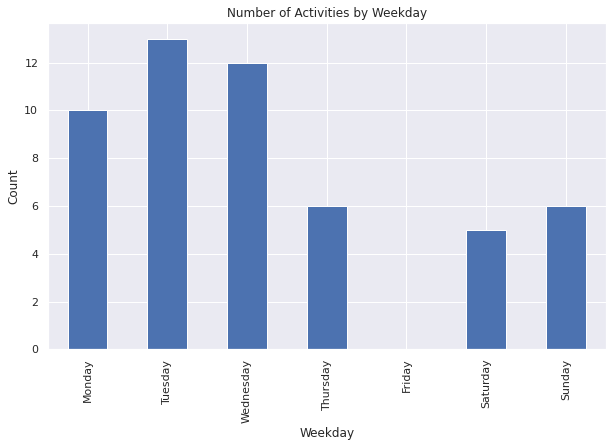

In [15]:
df_act["weekday"] = pd.Categorical(df_act["weekday"], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

weekday_counts = df_act["weekday"].value_counts()
weekday_counts = weekday_counts.sort_index()
weekday_counts.plot(kind="bar",figsize=(10, 6))
plt.title("Number of Activities by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_233858/3070702493.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_233858/3070702493.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



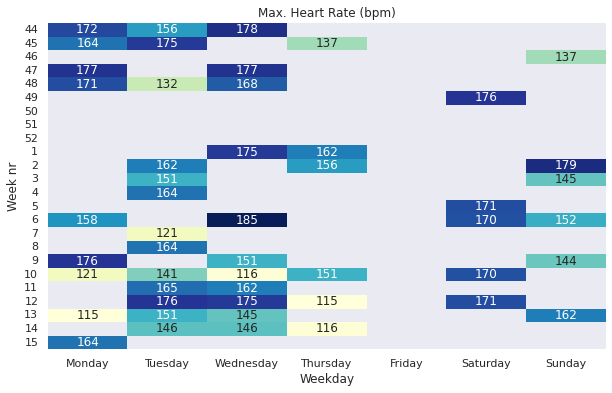

In [16]:
df_act_heat = df_act.sort_values(by='Start Time')
start_date = df_act_heat["Start Time"].iloc[0]
end_date = df_act_heat["End Time"].iloc[-1]
df_act_heat["date"] = df_act_heat["Start Time"].dt.date
df_act_heat = df_act_heat.set_index("date")

date_index = pd.date_range(start=start_date, end=end_date)
df_date = pd.DataFrame({'date': date_index})
df_date["date"] = df_date["date"]

df_date['week_number'] = df_date['date'].dt.isocalendar().week
df_date['weekday'] = df_date['date'].dt.day_name()
df_date["date"] = df_date["date"].dt.date
df_date = df_date.set_index("date")
df_act_heat=df_act_heat.drop(["weekday"], axis =1 )
df_act_heat = df_date.join(df_act_heat)

heat_df = df_act_heat[["week_number","Max. Heart Rate (bpm)","weekday"]]
# Convert the weekday column to a categorical variable with a specific order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heat_df["weekday"] = pd.Categorical(heat_df["weekday"], categories=weekday_order)
heat_df["date2"] = heat_df.index
heat_df = heat_df[~heat_df["date2"].duplicated()]
heat_df = heat_df.drop(["date2"], axis =1)
heat_data = heat_df.pivot("week_number", "weekday",  "Max. Heart Rate (bpm)")
df_44_to_52 = heat_data.iloc[15:]
pivoted_data = pd.concat([df_44_to_52, heat_data.iloc[:15]])

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivoted_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=ax)
ax.set_ylabel("Week nr")
ax.set_xlabel("Weekday")
ax.set_title("Max. Heart Rate (bpm)")

plt.show()

/tmp/ipykernel_233858/2137274817.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_233858/2137274817.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



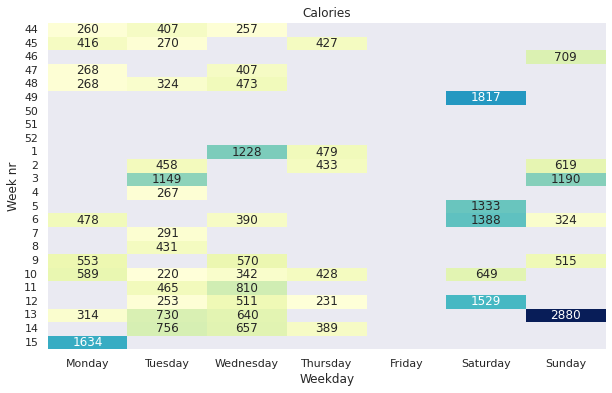

In [17]:
heat_df = df_act_heat[["week_number","Calories","weekday"]]
# Convert the weekday column to a categorical variable with a specific order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heat_df["weekday"] = pd.Categorical(heat_df["weekday"], categories=weekday_order)
heat_df["date2"] = heat_df.index
heat_df = heat_df[~heat_df["date2"].duplicated()]
heat_df = heat_df.drop(["date2"], axis =1)
heat_data = heat_df.pivot("week_number", "weekday",  "Calories")
df_44_to_52 = heat_data.iloc[15:]
pivoted_data = pd.concat([df_44_to_52, heat_data.iloc[:15]])

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivoted_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=ax)

ax.set_ylabel("Week nr")
ax.set_xlabel("Weekday")
ax.set_title("Calories")

plt.show()

In [18]:
df_act['Elapsed Duration (h:m:s)'] = pd.to_datetime(df_act["Elapsed Duration (h:m:s)"], format='%H:%M:%S')
df_act['MinutesDuration'] = df_act['Elapsed Duration (h:m:s)'].dt.hour*60 + df_act['Elapsed Duration (h:m:s)'].dt.minute

In [19]:
start=df_act["Start Time"].iloc[0] 
end = df_act["Start Time"].iloc[-1]
total_days = (start - end).days 
print(total_days)
total_weeks= total_days/7
print(total_weeks)
total_activities = len(df_act)
print(total_activities)
print(total_activities/total_weeks)

162
23.142857142857142
52
2.246913580246914


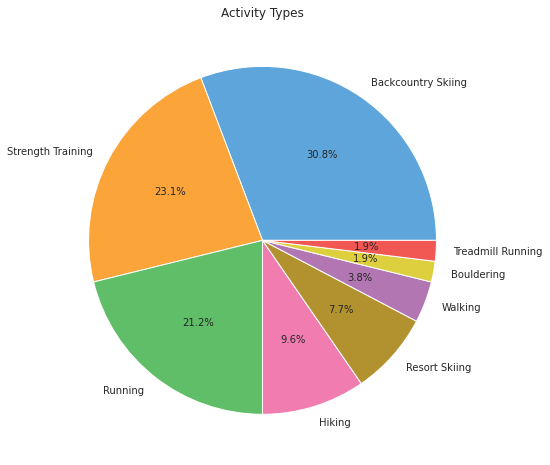

In [20]:
# get activity counts
activities = df_act["Activity Type"].value_counts()

# set color palette
colors = ['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0', '#B2912F', '#B276B2', '#DECF3F', '#F15854']
sns.set_palette(sns.color_palette(colors))

# plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(activities.values, labels=activities.index, autopct='%1.1f%%',textprops={'fontsize': 10})
plt.title('Activity Types')

plt.show()

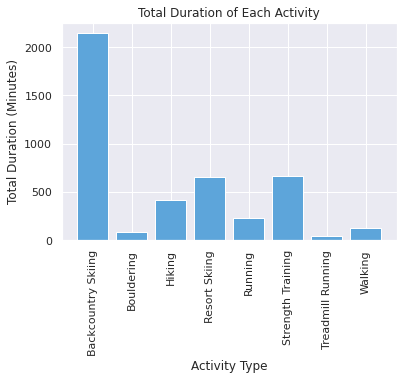

In [21]:
df_act_time = df_act.groupby("Activity Type")["MinutesDuration"].sum()
plt.bar(df_act_time.index, df_act_time.values)
plt.xlabel('Activity Type')
plt.ylabel('Total Duration (Minutes)')
plt.title('Total Duration of Each Activity')
plt.xticks(rotation=90)
plt.show()

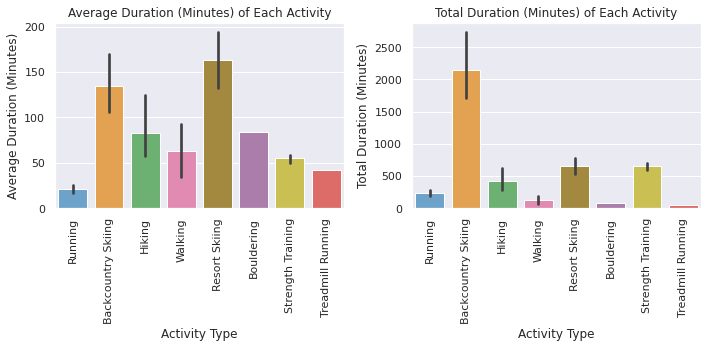

In [22]:
# Create subplots with more spacing
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
plt.subplots_adjust(wspace=0.5)

# First subplot
sns.barplot(x="Activity Type", y="MinutesDuration", data=df_act, estimator=np.mean, ax=ax1)
ax1.set_xlabel('Activity Type')
ax1.set_ylabel('Average Duration (Minutes)')
ax1.set_title('Average Duration (Minutes) of Each Activity')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=90)

# Second subplot
sns.barplot(x="Activity Type", y="MinutesDuration", data=df_act, estimator=np.sum, ax=ax2)
ax2.set_xlabel('Activity Type')
ax2.set_ylabel('Total Duration (Minutes)')
ax2.set_title('Total Duration (Minutes) of Each Activity')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


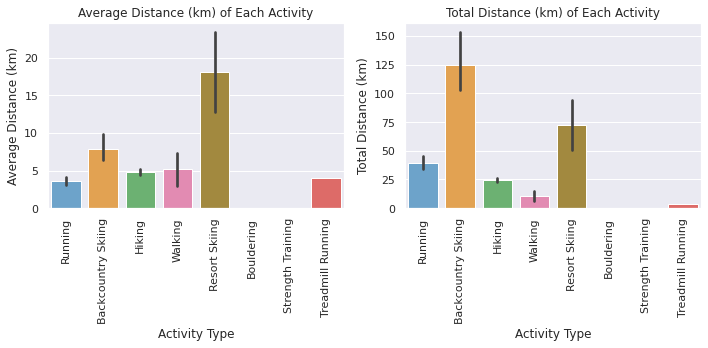

In [23]:
# Create subplots with more spacing
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
plt.subplots_adjust(wspace=0.5)

# First subplot
sns.barplot(x="Activity Type", y="Distance (km)", data=df_act, estimator=np.mean, ax=ax1)
ax1.set_xlabel('Activity Type')
ax1.set_ylabel('Average Distance (km)')
ax1.set_title('Average Distance (km) of Each Activity')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=90)

# Second subplot
sns.barplot(x="Activity Type", y="Distance (km)", data=df_act, estimator=np.sum, ax=ax2)
ax2.set_xlabel('Activity Type')
ax2.set_ylabel('Total Distance (km)')
ax2.set_title('Total Distance (km) of Each Activity')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), rotation=90)

# Display the plot
plt.tight_layout()
plt.show()



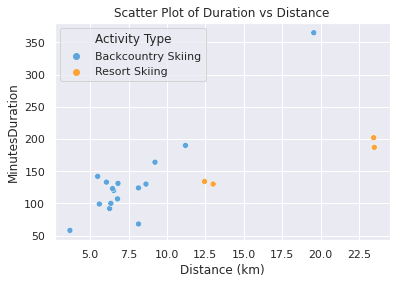

In [24]:
df_bcs = df_act[(df_act["Activity Type"] == "Backcountry Skiing") | (df_act["Activity Type"] == "Resort Skiing")]

sns.scatterplot(data=df_bcs, x="Distance (km)", y="MinutesDuration", hue="Activity Type")
plt.title("Scatter Plot of Duration vs Distance")
plt.show()

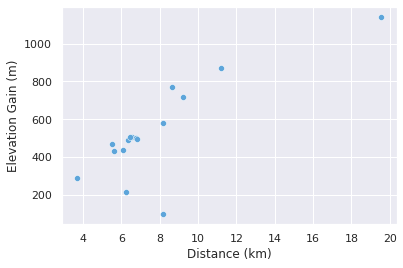

In [25]:
sns.scatterplot(data=df_act[(df_act["Activity Type"] == "Backcountry Skiing")], x="Distance (km)", y="Elevation Gain (m)")
plt.show()

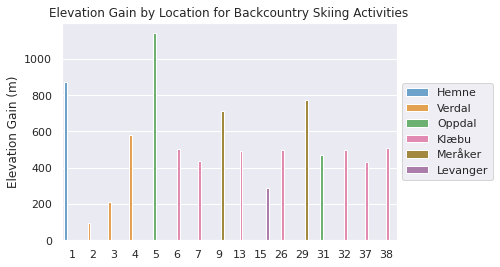

In [26]:
df_bcs = df_bcs.dropna(subset=['Elevation Gain (m)']) # Remove rows with NaN in 'Elevation Gain (m)' column

ax = sns.barplot(x=df_bcs.index, y='Elevation Gain (m)', hue='Location Name', data=df_bcs)
ax.set_title("Elevation Gain by Location for Backcountry Skiing Activities")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Move legend outside plot

plt.show()

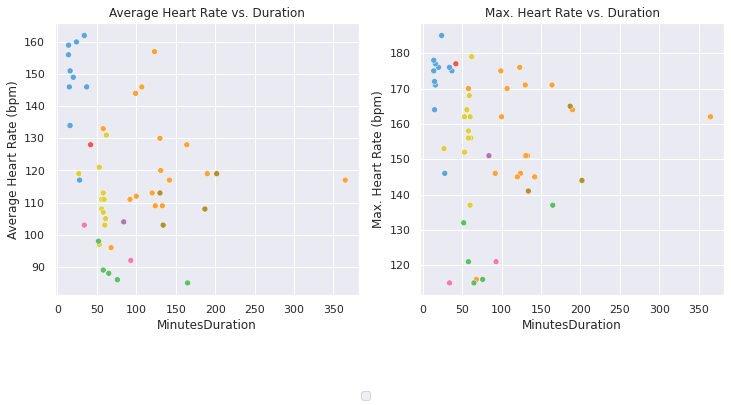

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
#ax1 = sns.scatterplot(data=df_act, y="Average Heart Rate (bpm)", x="MinutesDuration", hue="Activity Type")
# plot first scatterplot on first subplot
sns.scatterplot(data=df_act, y="Average Heart Rate (bpm)", x="MinutesDuration", hue="Activity Type", ax=axs[0], legend=False)
axs[0].set_title("Average Heart Rate vs. Duration")

# plot second scatterplot on second subplot
sns.scatterplot(data=df_act, y="Max. Heart Rate (bpm)", x="MinutesDuration", hue="Activity Type", ax=axs[1], legend=False)
axs[1].set_title("Max. Heart Rate vs. Duration")

# add common legend below subplots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)
fig.subplots_adjust(bottom=0.25)
plt.show()



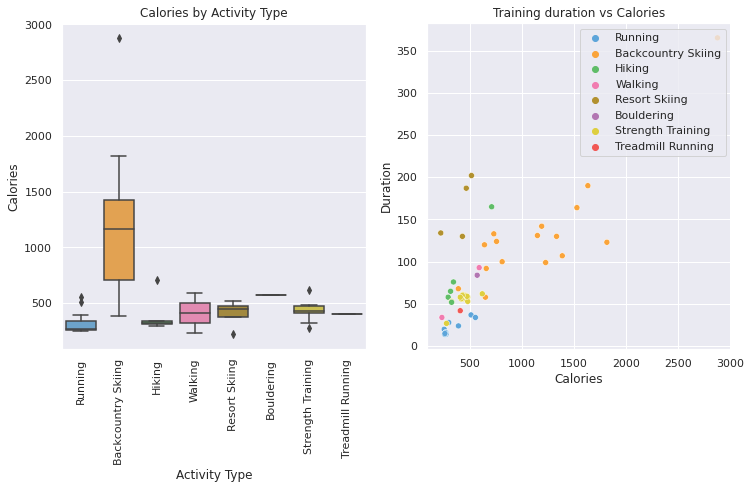

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plot first boxplot on first subplot
sns.boxplot(data=df_act, x='Activity Type', y='Calories', ax=axs[0])
axs[0].set_title('Calories by Activity Type')
axs[0].set_xlabel('Activity Type')
axs[0].set_ylabel('Calories')
axs[0].tick_params(axis='x', rotation=90)

# plot second scatterplot on second subplot
sns.scatterplot(data=df_act, x="Calories", y="MinutesDuration", hue="Activity Type", ax=axs[1])
axs[1].set_title("Training duration vs Calories")
axs[1].set_xlabel('Calories')
axs[1].set_ylabel('Duration')
axs[1].legend(loc='upper right')

plt.show()


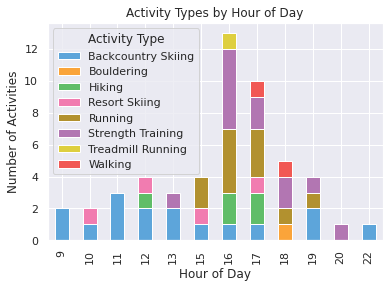

<Figure size 3600x360 with 0 Axes>

In [29]:
df_act["start_hour"] = df_act["Start Time"].dt.time
df_act['hour'] = df_act['Start Time'].dt.hour
df =df_act[["hour","Activity Type"]]

df.groupby(['hour', 'Activity Type']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Activities')
plt.title('Activity Types by Hour of Day')
plt.legend(title='Activity Type', loc='upper left')
plt.figure(figsize=(50, 5))
plt.show()


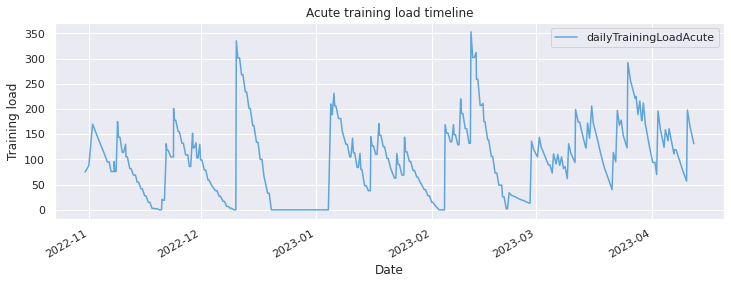

In [30]:
# Load JSON data into a Pandas DataFrame
df = pd.read_json("data/training_load.json")

# Convert timestamp column to datetime
# Convert timestamp column to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')


# Print DataFrame
df.plot(x='timestamp', y=['dailyTrainingLoadAcute'],figsize=(12,4))
plt.xlabel('Date')
plt.ylabel('Training load')
plt.title('Acute training load timeline')
plt.show()



In [31]:
df_map = df_act.dropna(subset=['Begin Longitude (°DD)'])
# Create map object
m = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each row in the dataframe
for index, row in df_map.iterrows():
    folium.Marker(location=[row['Begin Latitude (°DD)'], row['Begin Longitude (°DD)']]).add_to(m)

# Display map
m